In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

blur image classification

importing keras/tensorflow dataset

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

32*32 grid and 3 dimension colors rgb

data exploration

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
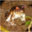

In [5]:
x_train[0]

In [6]:
y_train[0:5]#two demision array right we need to reshaspe it

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [8]:
y_train[0:5] #yeah successfully reshaped

array([6, 9, 9, 4, 1], dtype=uint8)

#creating the function for ploting image

In [9]:
#classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [10]:
#creating fuction
def plot_image(index):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index]])
    img=plt.show()
    return img


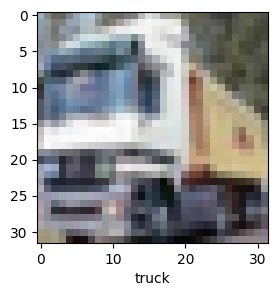

In [11]:
plot_image(1)

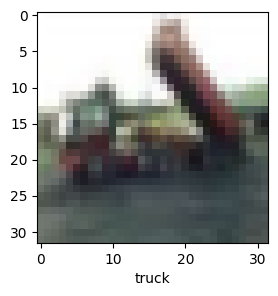

In [12]:
plot_image(2)

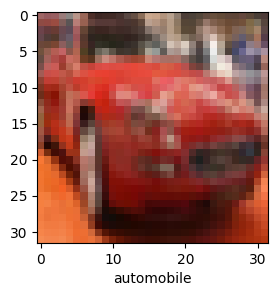

In [13]:
plot_image(5)

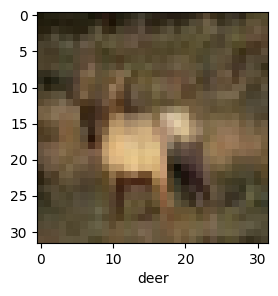

In [14]:
plot_image(3)

Building a ann model

scalling both x_train and y_train

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
#gpu installation for fast compile and reduce computation
# tf.device("\gpu:0")

In [22]:
model=keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000,activation="relu"),
      keras.layers.Dense(1000,activation="relu"),
      keras.layers.Dense(100,activation="relu"),
      keras.layers.Dense(10,activation="softmax")

])
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
# with tf.device("/gpu:0"):
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2980 - loss: 1.9506
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4138 - loss: 1.6494
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4453 - loss: 1.5510
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4747 - loss: 1.4845
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4942 - loss: 1.4279
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5101 - loss: 1.3876
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5251 - loss: 1.3379
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5346 - loss: 1.3068
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5543 - loss: 1.2607
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5644 - loss: 1.2286


In [29]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
y_pred=np.argmax(y_predict,axis=1)

In [26]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [32]:
y_pred[0:5]

array([3, 9, 8, 8, 4])

In [33]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[468,  40,  32,  12,  25,  28,  25,  19, 189, 162],
       [ 16, 594,   3,  11,   9,   6,  11,  18,  64, 268],
       [ 56,  18, 218,  62, 166, 170, 123,  71,  50,  66],
       [ 15,  20,  26, 236,  48, 279, 122,  38,  68, 148],
       [ 37,  14,  51,  42, 447,  97, 127,  67,  53,  65],
       [ 10,   8,  23, 109,  47, 503,  73,  62,  72,  93],
       [  2,  18,  23,  42,  88,  79, 636,  16,  22,  74],
       [ 13,   8,  22,  37,  55,  99,  28, 537,  26, 175],
       [ 46,  47,   4,  10,  11,   8,   5,   5, 708, 156],
       [ 11, 116,   3,  19,   9,  15,  11,  13,  35, 768]])

In [34]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.47      0.56      1000
           1       0.67      0.59      0.63      1000
           2       0.54      0.22      0.31      1000
           3       0.41      0.24      0.30      1000
           4       0.49      0.45      0.47      1000
           5       0.39      0.50      0.44      1000
           6       0.55      0.64      0.59      1000
           7       0.63      0.54      0.58      1000
           8       0.55      0.71      0.62      1000
           9       0.39      0.77      0.52      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.50     10000
weighted avg       0.53      0.51      0.50     10000



#building and CONVOLUTIONAL NUERAL NETWORK

In [44]:
cnn=keras.Sequential([
    #convolution
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    #pooling
    keras.layers.MaxPooling2D((2,2)),
    #convolution
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    #flatten into single dimension
    keras.layers.Flatten(),
    #actually no need much hidden layer neauron cnn haave high potential
    keras.layers.Dense(64,activation="relu"),
    # keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [45]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5602 - loss: 1.2202
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5758 - loss: 1.1837
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5836 - loss: 1.1585
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5880 - loss: 1.1500
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5905 - loss: 1.1431
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5942 - loss: 1.1262
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5995 - loss: 1.1189
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6003 - loss: 1.1173
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6032 - loss: 1.1105
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6047 - loss: 1.0951


In [46]:
model.evaluate(x_train,y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6147 - loss: 1.0770


[1.0859026908874512, 0.6108999848365784]

In [47]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5220 - loss: 1.4099


[1.4100812673568726, 0.5156999826431274]

In [48]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [52]:
y_test[0]

3

In [51]:
np.argmax(y_pred[0])

3

In [53]:
y_pred=np.argmax(y_pred,axis=1)

In [54]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [55]:
y_pred[0:5]

array([3, 8, 8, 8, 4])

compare to Ann it given best accuracy

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[573,  51,  54,  19,  53,  17,  33,  19, 136,  45],
       [ 40, 652,  17,  23,  17,  12,  15,  19,  70, 135],
       [ 73,  25, 399,  60, 154,  75, 113,  60,  24,  17],
       [ 25,  24,  99, 259,  88, 215, 164,  55,  28,  43],
       [ 46,  15, 143,  39, 490,  35, 119,  67,  31,  15],
       [ 21,  19,  95, 144,  87, 402,  90,  79,  42,  21],
       [  8,  21,  76,  41, 127,  49, 625,  21,  12,  20],
       [ 45,  23,  56,  48, 131,  63,  26, 547,  16,  45],
       [ 89,  68,  20,  17,  40,  19,  15,   9, 666,  57],
       [ 43, 210,  20,  22,  21,  18,  24,  44,  54, 544]])

In [57]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      1000
           1       0.59      0.65      0.62      1000
           2       0.41      0.40      0.40      1000
           3       0.39      0.26      0.31      1000
           4       0.41      0.49      0.44      1000
           5       0.44      0.40      0.42      1000
           6       0.51      0.62      0.56      1000
           7       0.59      0.55      0.57      1000
           8       0.62      0.67      0.64      1000
           9       0.58      0.54      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



In [60]:
len(y_pred)

10000

In [58]:
import seaborn as sns

<Axes: >

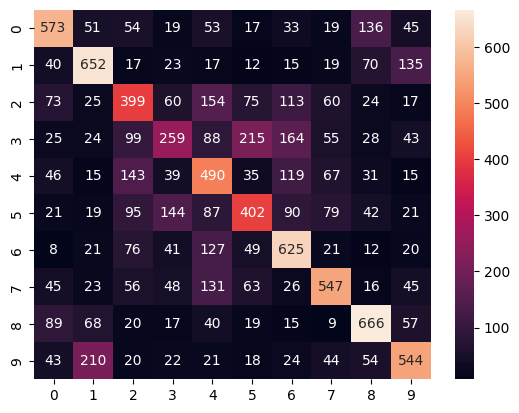

In [59]:
sns.heatmap(cm,annot=True,fmt="d")